In [1]:
import pandas as pd
import seaborn as sns
anime = pd.read_csv('Anime.csv')
    
anime.head()

,ID,Title,English,Synopsis,Type,Episodes,Status,Start_Aired,End_Aired,Premiered,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25,Finished Airing,7-Apr-13,29-Sep-13,Spring 2013,...,"Gore, Military, Survival",Shounen,24,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37,Finished Airing,4-Oct-06,27-Jun-07,Fall 2006,...,Psychological,Shounen,23,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64,Finished Airing,5-Apr-09,4-Jul-10,Spring 2009,...,Military,Shounen,24,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12,Finished Airing,5-Oct-15,21-Dec-15,Fall 2015,...,"Parody, Super Power",Seinen,24,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25,Finished Airing,8-Jul-12,23-Dec-12,Summer 2012,...,"Love Polygon, Video Game",Unknown,23,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997


# Portfolio assignment 16
30 min: Train a decision tree to predict one of the categorical columns of your own dataset.

Split your dataset into a train (70%) and test (30%) set.
Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree.
Use your decision tree model to make predictions for both the train and test set.
Calculate the accuracy for both the train set predictions and test set predictions.
Is the accurracy different? Did you expect this difference?
Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

# Training Model

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [3]:
features= ['Episodes']
dt = DecisionTreeClassifier(max_depth = 3) # Increase max_depth to see effect in the plot
dt.fit(anime[features].fillna(1), anime['Type'])

DecisionTreeClassifier(max_depth=3)

In [4]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

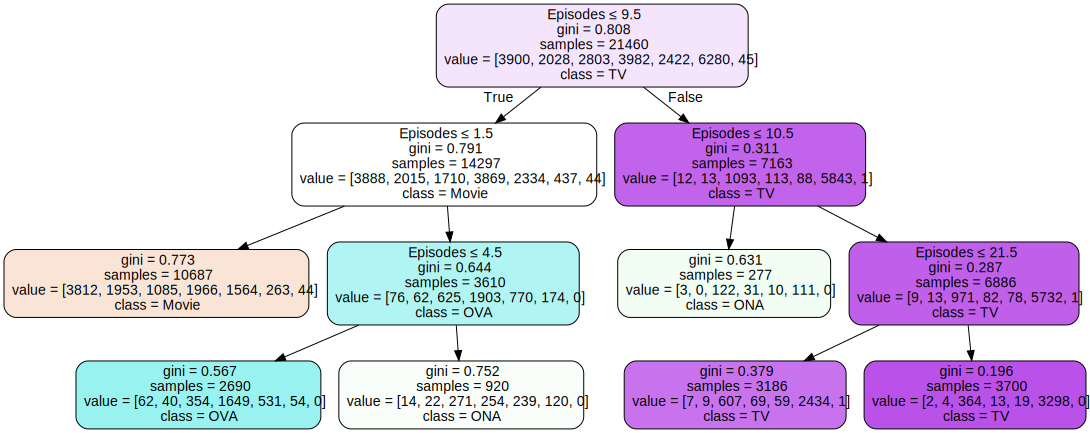

In [5]:
plot_tree_classification(dt, features, np.sort(anime.Type.unique()))

## Evalutating

In [6]:
predictions = dt.predict(anime[features].fillna(1))


In [7]:
predictions

array(['TV', 'TV', 'TV', ..., 'Movie', 'Movie', 'Movie'], dtype=object)

In [8]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [9]:
calculate_accuracy(predictions, anime.Type)

0.5398881640260951

# Test/Train 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
anime_train, anime_test = train_test_split(anime, test_size=0.3, random_state=42, stratify=anime['Type'])
print(anime_train.shape, anime_test.shape)

(15022, 25) (6438, 25)


In [12]:
features= ['Episodes', 'Score']
dt_classification = DecisionTreeClassifier(max_depth = 5) # Increase max_depth to see effect in the plot
dt_classification.fit(anime_train[features].fillna(1), anime_train['Type'])

DecisionTreeClassifier(max_depth=5)

# Overfitting

In [13]:
predictionsOnTrainset = dt_classification.predict(anime_train[features].fillna(1))
predictionsOnTestset = dt_classification.predict(anime_test[features].fillna(1))

accuracyTrain = calculate_accuracy(predictionsOnTrainset, anime_train.Type)
accuracyTest = calculate_accuracy(predictionsOnTestset, anime_test.Type)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.5534549327652776
Accuracy on test set 0.5470643056849953


# Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.

Split your dataset into a train (70%) and test (30%) set. Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. Use your decision tree model to make predictions for both the train and test set. Calculate the RMSE for both the train set predictions and test set predictions. Is the accurracy different? Did you expect this difference? Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [14]:
AnimeNumerical = anime[['Episodes','Duration_Minutes','Score','Scored_Users','Ranked','Popularity','Members','Favorites']].dropna().corr()
AnimeNumerical.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

C:\Users\Kaspe\AppData\Local\Temp\ipykernel_15836\4154488088.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  AnimeNumerical.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,Episodes,Duration_Minutes,Score,Scored_Users,Ranked,Popularity,Members,Favorites
Episodes,1.00,-0.06,0.07,0.04,-0.06,-0.03,0.05,0.06
Duration_Minutes,-0.06,1.00,0.30,0.07,-0.30,-0.24,0.06,0.02
Score,0.07,0.30,1.00,0.40,-0.98,-0.69,0.40,0.24
Scored_Users,0.04,0.07,0.40,1.00,-0.38,-0.45,0.88,0.56
Ranked,-0.06,-0.30,-0.98,-0.38,1.00,0.72,-0.37,-0.20
Popularity,-0.03,-0.24,-0.69,-0.45,0.72,1.00,-0.44,-0.20
Members,0.05,0.06,0.40,0.88,-0.37,-0.44,1.00,0.78
Favorites,0.06,0.02,0.24,0.56,-0.20,-0.20,0.78,1.00


In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
features= ['Episodes']
dt_regression = DecisionTreeRegressor(max_depth = 4) # Increase max_depth to see effect in the plot
dt_regression.fit(anime_train[features], anime_train['Duration_Minutes'])

DecisionTreeRegressor(max_depth=4)

In [17]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

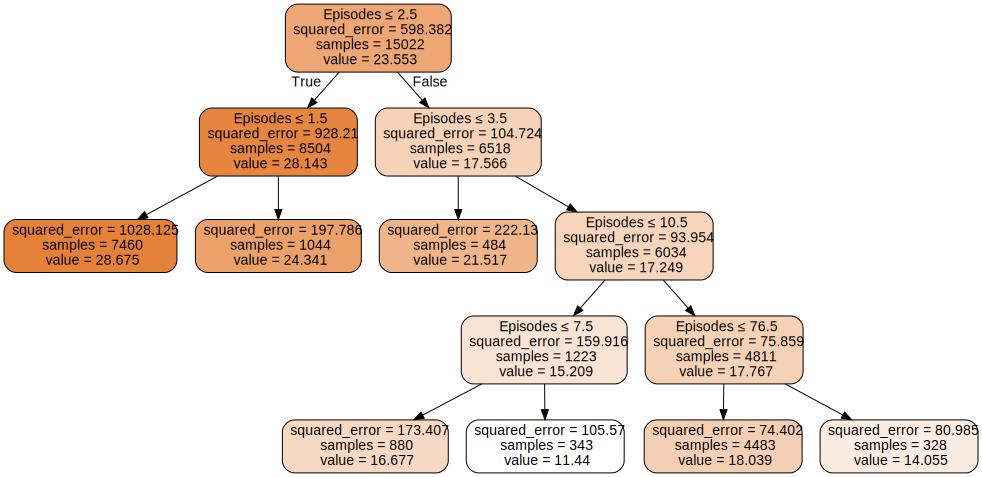

In [18]:
plot_tree_regression(dt_regression, features)

## Evaluating

In [19]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [20]:
predictionsOnTrainset = dt_regression.predict(anime_train[features])
predictionsOnTestset = dt_regression.predict(anime_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, anime_train.Duration_Minutes)
rmseTest = calculate_rmse(predictionsOnTestset, anime_test.Duration_Minutes)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 23.833069014546666
RMSE on test set 23.819498605268542
